In [50]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

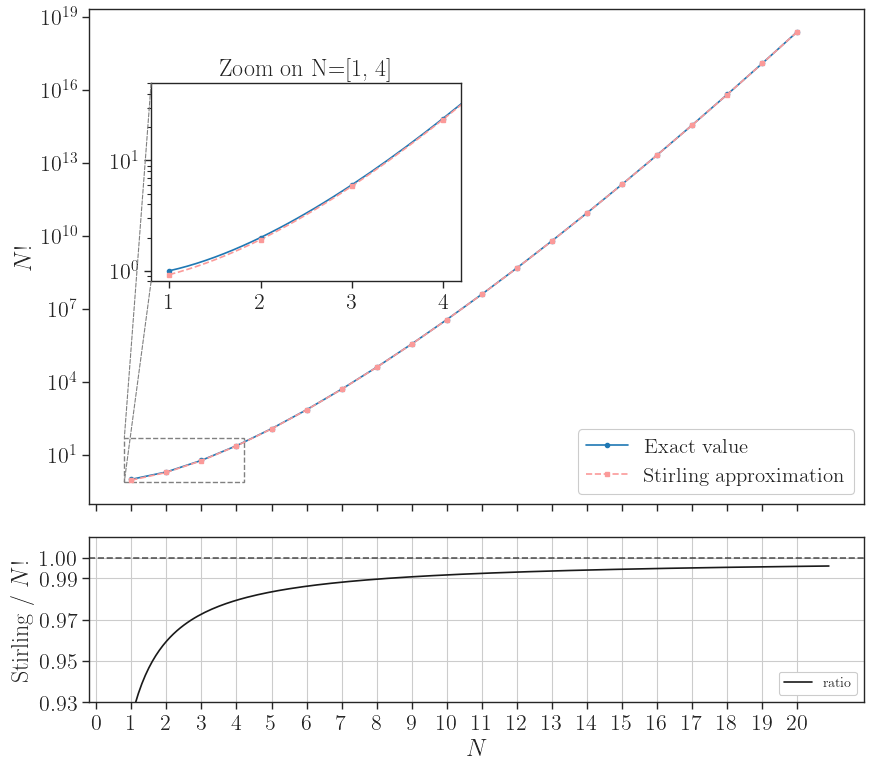

In [107]:

#Defining the space for the two plots 
fig, (ax0, ax1) = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]},figsize=(10,9))
plt.subplots_adjust(hspace=0.1)

#Data
# --- Data Preparation ---
n_main = np.arange(1.0, 21.0, 1.0)
fact_main = factorial(n_main)
approx_main = np.sqrt(2 * np.pi * n_main) * (n_main**n_main) * np.exp(-n_main)

n_ratio = np.arange(1.0, 21.0, 0.1)
fact_ratio = factorial(n_ratio)
approx_ratio = np.sqrt(2 * np.pi * n_ratio) * (n_ratio**n_ratio) * np.exp(-n_ratio)
ratio = approx_ratio / fact_ratio


#Main plot
ax0.plot(n_main, fact_main, 'o-', color = sns.color_palette('Paired')[1], label = 'Exact value', ms = 3)
ax0.plot(n_main, approx_main,'s--', color = sns.color_palette('Paired')[4], label = 'Stirling approximation', ms = 3)


# --- Inset Plot ---
# Create the inset within the main plot (ax0)
ax_inset = ax0.inset_axes([0.08, 0.45, 0.4, 0.4])
ax_inset.set_yscale('log') # Use log scale

# Plot the smooth data on the inset
ax_inset.plot(n_ratio, fact_ratio, color=sns.color_palette('Paired')[1])
ax_inset.plot(n_ratio, approx_ratio, '--', color=sns.color_palette('Paired')[4])
ax_inset.plot(n_main, fact_main, 'o', color=sns.color_palette('Paired')[1], ms = 3)
ax_inset.plot(n_main, approx_main, 's', color=sns.color_palette('Paired')[4], ms = 3)

# Set the visible range for the inset
xlim_inset = (0.8, 4.2)
ylim_inset = (0.8, 50) # Must be > 0 for log scale
ax_inset.set_xlim(xlim_inset)
ax_inset.set_ylim(ylim_inset)
ax_inset.set_title('Zoom on N=[1, 4]')


# --- 5. Manual Inset Connectors ---
# Define the zoom region using the inset's limits
x1, x2 = xlim_inset
y1, y2 = ylim_inset

# Draw the rectangle on the main plot
ax0.add_patch(Rectangle((x1, y1), x2 - x1, y2 - y1,
              edgecolor='gray', facecolor='none', linestyle='--', lw=1))

# Draw the top connector
con1 = ConnectionPatch(xyA=(0, 1), coordsA=ax_inset.transAxes,
                       xyB=(x1, y2), coordsB=ax0.transData,
                       color='gray', linestyle='--')
# Draw the bottom connector
con2 = ConnectionPatch(xyA=(0, 0), coordsA=ax_inset.transAxes,
                       xyB=(x1, y1), coordsB=ax0.transData,
                       color='gray', linestyle='--')
# Add the connectors to the figure
fig.add_artist(con1)
fig.add_artist(con2)


#Ratio plot
#N Values
n = np.array(np.arange(1.0, 21.0, 0.1))

#Computing the factorial exactly
fact = factorial(n)

#Computing the Stirling approximation
approx = np.sqrt(2 * np.pi * n) * (n**n) * np.exp(-n)

ratio = approx /fact

ax1.plot(n, ratio, color = 'k', label = 'ratio')
ax1.axhline(y=1, color='k', linestyle='--', alpha=0.7)

    
# --- Main plot configs ---
ax0.legend(framealpha=1.0, ncol = 1, loc='lower right',fontsize=15)
ax0.set_title('')
ax0.set_yscale('log')
ax0.set_ylabel(r'$N!$')
#ax0.grid(True, which="both", linestyle='--')



# --- Ratio plot configs ---
#ax1.axhline(y=1, color='k', linestyle='--')
ax1.legend(framealpha=1.0,ncol = 2, loc='lower right',fontsize=10)
ax1.set_ylabel(r'Stirling / $N!$')
ax1.set_xlabel(r'$N$')
y = np.arange(0.93, 1.01,0.02) 
y = np.append(y,1.00)
ax1.set_yticks(y)
ax1.set_xticks(np.arange(0.0,20.5,1.0))
ax1.grid(True)
ax1.set_ylim(0.93, 1.01)
#ax1.set_ylim(0.5, 1.5) # Set a reasonable y-range for the ratio
plt.savefig('Stirling_approximation.png')
plt.show()